$$H/W$$

### ***Start***

In [1]:
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
df = pd.read_csv('hw.csv').dropna()
df

,Country,Region,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),Phones (per 1000),Arable (%),Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service
0,Afghanistan,ASIA (EX. NEAR EAST),31056997,647500,"48,0","0,00","23,06","163,07",700.0,"36,0","3,2","12,13","0,22","87,65",1,"46,6","20,34","0,38","0,24","0,38"
1,Albania,EASTERN EUROPE,3581655,28748,"124,6","1,26","-4,93","21,52",4500.0,"86,5","71,2","21,09","4,42","74,49",3,"15,11","5,22","0,232","0,188","0,579"
2,Algeria,NORTHERN AFRICA,32930091,2381740,"13,8","0,04","-0,39",31,6000.0,"70,0","78,1","3,22","0,25","96,53",1,"17,14","4,61","0,101","0,6","0,298"
6,Anguilla,LATIN AMER. & CARIB,13477,102,"132,1","59,80","10,76","21,03",8600.0,"95,0","460,0",0,0,100,2,"14,17","5,34","0,04","0,18","0,78"
7,Antigua & Barbuda,LATIN AMER. & CARIB,69108,443,"156,0","34,54","-6,15","19,46",11000.0,"89,0","549,9","18,18","4,55","77,27",2,"16,93","5,37","0,038","0,22","0,743"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
218,Venezuela,LATIN AMER. & CARIB,25730435,912050,"28,2","0,31","-0,04","22,2",4800.0,"93,4","140,1","2,95","0,92","96,13",2,"18,71","4,92","0,04","0,419","0,541"
219,Vietnam,ASIA (EX. NEAR EAST),84402966,329560,"256,1","1,05","-0,45","25,95",2500.0,"90,3","187,7","19,97","5,95","74,08",2,"16,86","6,22","0,209","0,41","0,381"
224,Yemen,NEAR EAST,21456188,527970,"40,6","0,36",0,"61,5",800.0,"50,2","37,2","2,78","0,24","96,98",1,"42,89","8,3","0,135","0,472","0,393"
225,Zambia,SUB-SAHARAN AFRICA,11502010,752614,"15,3","0,00",0,"88,29",800.0,"80,6","8,2","7,08","0,03","92,9",2,41,"19,93","0,22","0,29","0,489"


### ***Regionlarda nechtadan davlat bor?***

C:\Users\diyma\AppData\Local\Temp\ipykernel_3620\516750931.py:6: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(regions, rotation=75)


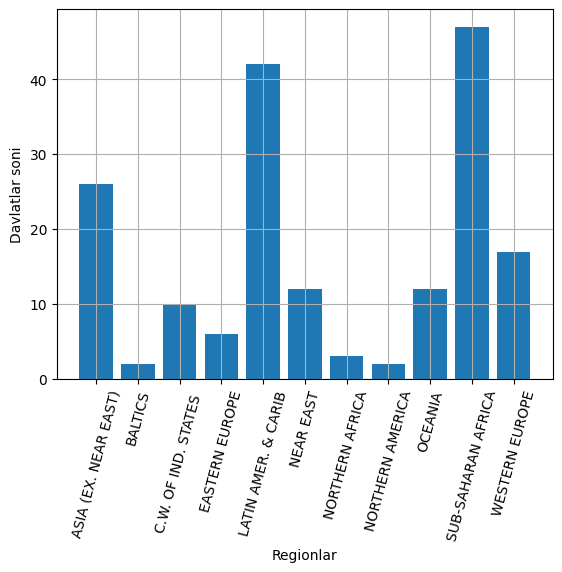

In [10]:
df.groupby('Region')['Country'].count()
regions = sorted(df['Region'].unique())

fig, ax = plt.subplots()
ax.bar(regions, df.groupby('Region')['Country'].count())
ax.set_xticklabels(regions, rotation=75)
ax.set_xlabel("Regionlar")
ax.set_ylabel("Davlatlar soni")
ax.grid(True)
plt.show()

Eng ko'p davlatlar **SUB-SAHARAN AFRICA** regionida ekan, eng kam esa **NORTHERN AFRICA** va **BALTICS** da. Bugungi vazifamiz regionlarda davlat ko'pligi ularga qanday ta'sir qilishini aniqlash.

### ***Qaysi regionlar boy?***

C:\Users\diyma\AppData\Local\Temp\ipykernel_3620\532729510.py:3: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(regions, rotation=75)


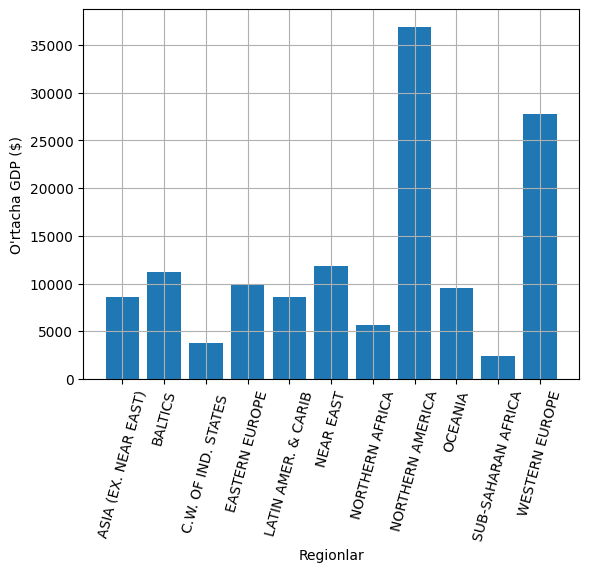

In [4]:
fig, ax = plt.subplots()
ax.bar(regions, df.groupby('Region')['GDP ($ per capita)'].mean())
ax.set_xticklabels(regions, rotation=75)
ax.set_xlabel("Regionlar")
ax.set_ylabel("O'rtacha GDP ($)")
ax.grid(True)
plt.show()

Kam davlarga ega bo'lgan **NORTHERN AMERICA** eng boy region, **BALTICS** o'rtacha urinlarda. Eg ko'p regionli **SUB-SAHARAN AFRICA** esa eng kambag'al.

### ***Qaysi regionlarda aholi zichligi katta?***

C:\Users\diyma\AppData\Local\Temp\ipykernel_3620\1112369053.py:10: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(regions, rotation=75)


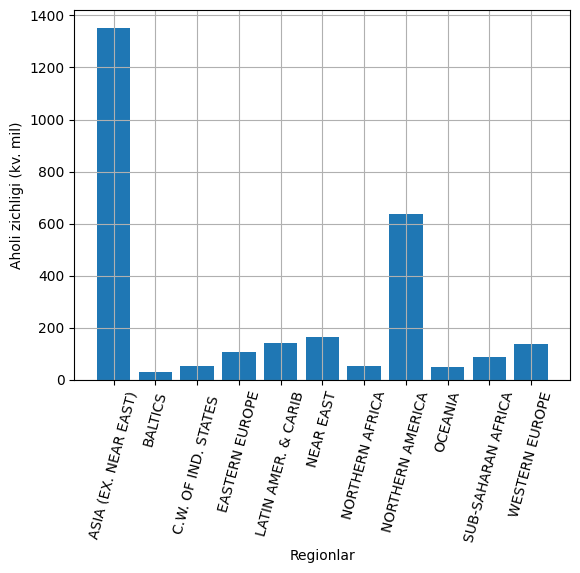

In [5]:
def str_to_float(n):
    if type(n) != str:
        return n
    else:
        return float(str(n).replace(',', '.'))

fig, ax = plt.subplots()
df['Pop. Density (per sq. mi.)'] = df['Pop. Density (per sq. mi.)'].transform(str_to_float)
ax.bar(regions, df.groupby('Region')['Pop. Density (per sq. mi.)'].mean())
ax.set_xticklabels(regions, rotation=75)
ax.set_xlabel("Regionlar")
ax.set_ylabel("Aholi zichligi (kv. mil)")
ax.grid(True)
plt.show()

Bu safar ko'p davlatli regionlar bilan kam davlatli regionlar deyarli bir xil natija berdi. Demak zichlikka ta'sir qilmaydi.

### ***Qaysi regionlarda qanaqa darajada industriallashgan?***

C:\Users\diyma\AppData\Local\Temp\ipykernel_3620\2955181899.py:4: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(regions, rotation=75)


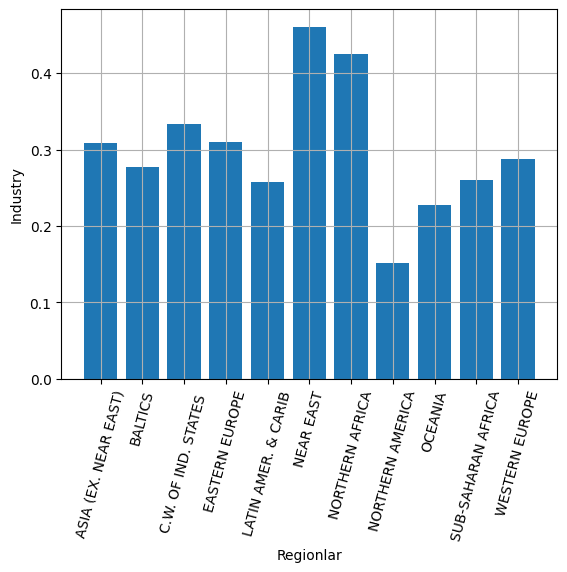

In [8]:
fig, ax = plt.subplots()
df['Industry'] = df['Industry'].transform(str_to_float)
ax.bar(regions, df.groupby('Region')['Industry'].mean())
ax.set_xticklabels(regions, rotation=75)
ax.set_xlabel("Regionlar")
ax.set_ylabel("Industry")
ax.grid(True)
plt.show()

### ***Natija***

C:\Users\diyma\AppData\Local\Temp\ipykernel_3620\2361369867.py:4: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[0, 0].set_xticklabels(regions, rotation=35)
C:\Users\diyma\AppData\Local\Temp\ipykernel_3620\2361369867.py:9: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[0, 1].set_xticklabels(regions, rotation=35)
C:\Users\diyma\AppData\Local\Temp\ipykernel_3620\2361369867.py:14: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[1, 0].set_xticklabels(regions, rotation=35)
C:\Users\diyma\AppData\Local\Temp\ipykernel_3620\2361369867.py:19: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[1, 1].set_xticklabels(regions, rotation=35)


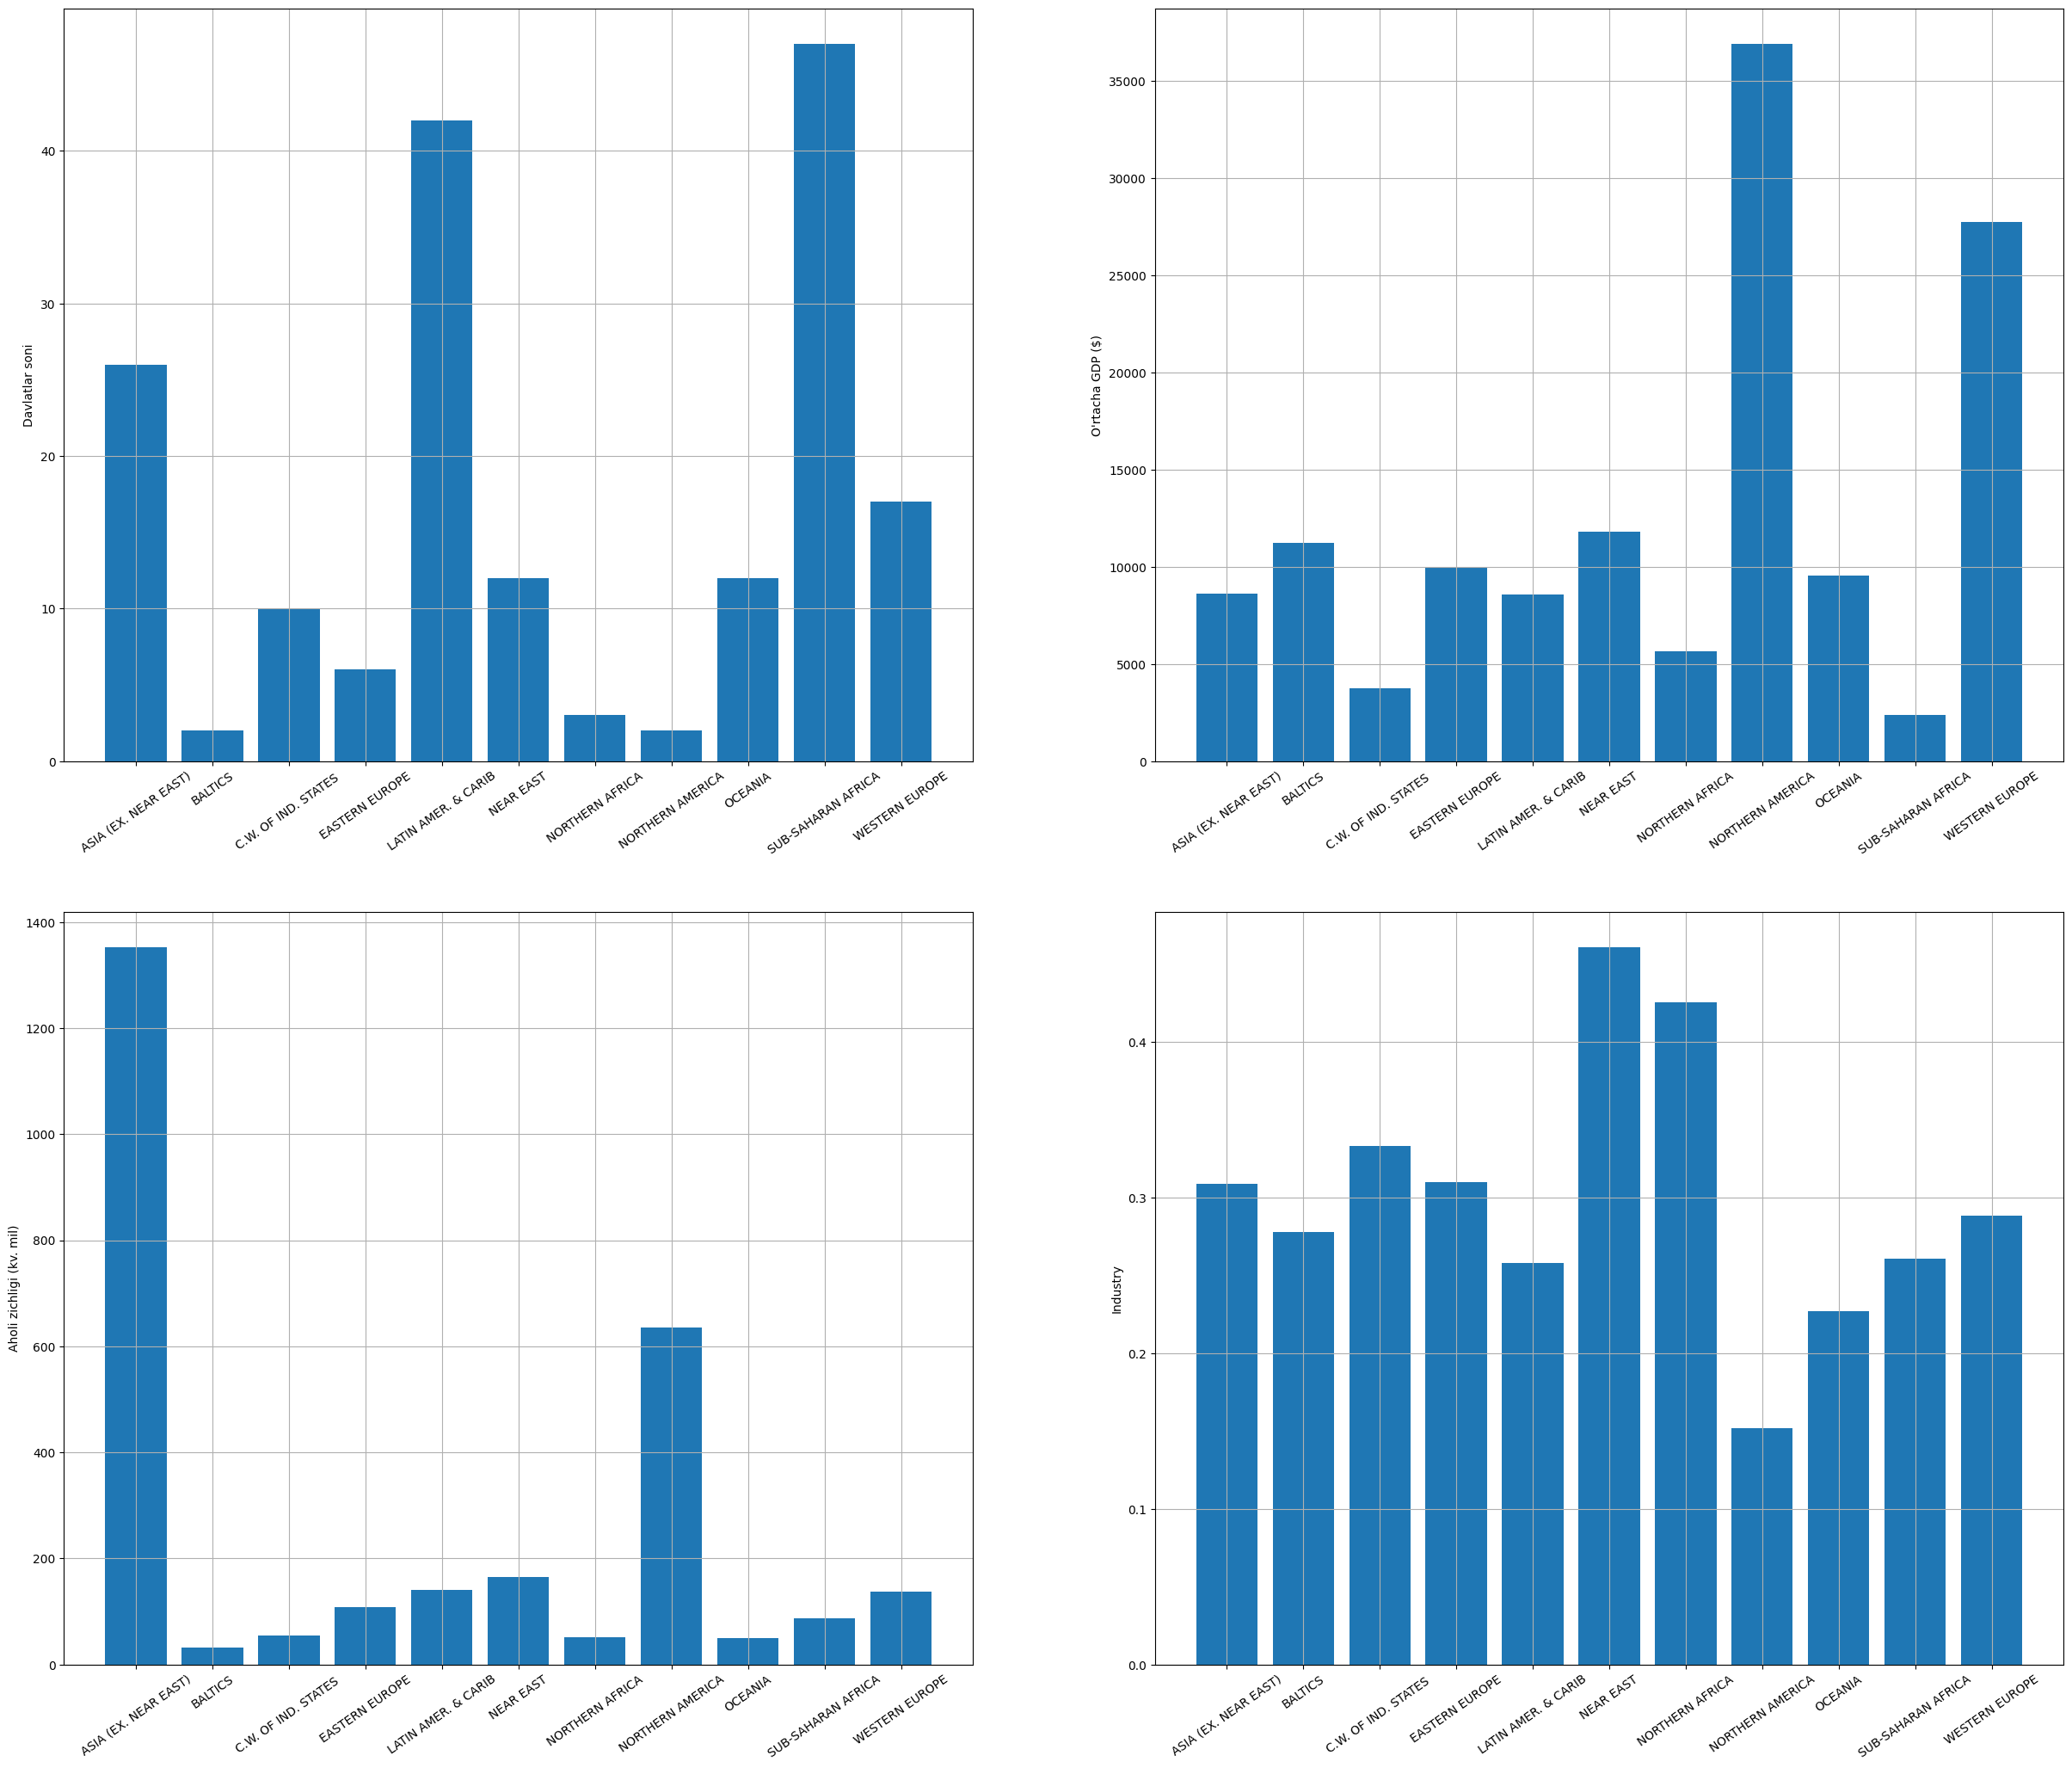

In [32]:
fig, ax = plt.subplots(2, 2, figsize=(30,25))

ax[0, 0].bar(regions, df.groupby('Region')['Country'].count())
ax[0, 0].set_xticklabels(regions, rotation=35)
ax[0, 0].set_ylabel("Davlatlar soni")
ax[0, 0].grid(True)

ax[0, 1].bar(regions, df.groupby('Region')['GDP ($ per capita)'].mean())
ax[0, 1].set_xticklabels(regions, rotation=35)
ax[0, 1].set_ylabel("O'rtacha GDP ($)")
ax[0, 1].grid(True)

ax[1, 0].bar(regions, df.groupby('Region')['Pop. Density (per sq. mi.)'].mean())
ax[1, 0].set_xticklabels(regions, rotation=35)
ax[1, 0].set_ylabel("Aholi zichligi (kv. mil)")
ax[1, 0].grid(True)

ax[1, 1].bar(regions, df.groupby('Region')['Industry'].mean())
ax[1, 1].set_xticklabels(regions, rotation=35)
ax[1, 1].set_ylabel("Industry")
ax[1, 1].grid(True)

plt.show()